## Statistics and Data Science 2 (Python)

# Final Project 

### Group: 
### Team members:

# Importing libraries

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

## Getting data

In [133]:
df = pd.read_csv('churn_train.csv')
data_to_predict = pd.read_csv('X_churn_test.csv')
df

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,3234373639353330,313434,33,231.21,727.20,0.00,430.02,218.10,15.85,50.23,...,33,8,4,124,29,132,33,0,0,0
1,3430333334383330,343835,33,0.15,115.91,3565.02,268.58,156.62,0.00,59.07,...,134,0,47,232,87,232,134,0,0,0
2,3439383237353231,343636,33,66.29,1137.81,93.33,0.00,41.78,0.00,0.38,...,13,0,1,0,12,0,13,0,0,0
3,3339353736373733,343433,33,0.01,6.21,2333.79,258.10,41.23,67.80,20.45,...,51,72,25,118,26,200,51,0,0,0
4,3439313439343036,343835,31,33.12,1.42,59.54,58.58,12.72,3.35,3.18,...,14,5,7,44,7,49,14,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411202,3435353031383633,343433,33,0.00,2580.72,0.00,112.63,5.63,8.48,0.40,...,11,8,2,42,9,50,11,0,0,0
411203,3533343630313335,343438,31,0.00,0.00,0.00,96.62,103.18,3.65,40.17,...,13,10,5,14,7,24,12,0,1,0
411204,3338373838373137,343637,31,0.00,0.00,0.00,0.00,13.33,0.00,0.00,...,20,0,0,0,20,0,20,0,0,0
411205,35363139353433,343834,31,121.83,672.43,0.00,17.33,40.47,0.00,31.02,...,35,0,21,34,14,34,35,0,0,0


In [134]:
df.describe()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
count,4.112070e+05,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,...,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000
mean,3.125054e+15,327921.407666,31.631302,44.390397,938.026259,2877.612561,108.613362,62.777042,12.854688,9.466825,...,29.094964,10.441342,7.746619,38.723995,21.259645,49.663097,29.075740,0.047378,0.019224,0.049591
std,8.593942e+14,51001.329259,0.929501,228.466027,2282.175569,4939.904365,199.013605,99.755581,19.478867,16.789832,...,31.304190,14.849228,11.978159,50.371299,24.206020,58.825979,31.296398,0.706770,0.358201,0.217098
min,3.531360e+05,3138.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.231393e+15,323531.000000,31.000000,0.000000,0.000000,0.000000,2.780000,9.570000,0.000000,0.220000,...,8.000000,0.000000,1.000000,2.000000,4.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,3.337374e+15,343230.000000,31.000000,0.000000,77.550000,107.580000,45.050000,33.020000,4.950000,3.300000,...,20.000000,5.000000,4.000000,22.000000,14.000000,32.000000,20.000000,0.000000,0.000000,0.000000
75%,3.437364e+15,343636.000000,33.000000,0.570000,788.535000,4253.415000,132.250000,77.570000,18.330000,11.550000,...,40.000000,15.000000,10.000000,56.000000,30.000000,73.000000,40.000000,0.000000,0.000000,0.000000
max,3.536383e+15,353036.000000,33.000000,27971.110000,96905.370000,201234.910000,9197.630000,4720.780000,441.880000,999.780000,...,1258.000000,350.000000,499.000000,1109.000000,1024.000000,1346.000000,1258.000000,118.000000,99.000000,1.000000


# Data Preprocessing

### Step 2. Finding nulls

In [135]:
df.notna().all()

C1        True
C2        True
C3        True
N1        True
N2        True
N3        True
N4        True
N5        True
N6        True
N7        True
N8        True
N9        True
N10       True
N11       True
N12       True
N13       True
N14       True
N15       True
N16       True
N17       True
N18       True
N19       True
N20       True
N21       True
N22       True
N23       True
TARGET    True
dtype: bool

#### Nothing is empty :(

### Step 2. Dealing with the categorial features

In [136]:
df['C1'].value_counts()

C1
3234373639353330    1
3437333635323930    1
3231333634373439    1
3335363630303934    1
3435313438333239    1
                   ..
3333323235303431    1
3139333337313033    1
3333373830303338    1
3134343232323234    1
3333363531323438    1
Name: count, Length: 411207, dtype: int64

In [137]:
df['C2'].value_counts(), df['C2'].value_counts().quantile(0.75), df['C2'].value_counts().quantile(0.5), df['C2'].value_counts().quantile(0.25)

(C2
 343637    47854
 343439    45986
 343433    35379
 343835    34155
 343038    32951
           ...  
 323530        1
 3437          1
 313433        1
 353031        1
 3330          1
 Name: count, Length: 63, dtype: int64,
 5363.5,
 1482.0,
 136.5)

In [138]:
unique = df['C2'].unique()

for i in unique:
    if df['C2'].value_counts()[i] > df['C2'].value_counts().quantile(0.75):
        print(i)

343835
343636
343433
343834
343637
313339
333538
313435
323531
343038
343438
343139
343439
313430
313931
323233


In [139]:
df['C3'].value_counts()

C3
31    281390
33    129779
32        38
Name: count, dtype: int64

Let us explain what we got:

1) Each value in this column is unique, maybe this column identifies each person, like id.
    Therefore, it is useless to add C1 column into our train data.

2) This is more complicated
    There are 63 unique categories, but many of them has < 1% of population
    So, i found 0.75 quantile, which covers 1.5% of population.
    The, i will divide this groups into 14 categories from 1 to 12 and 0 category which is Rare.

3) Just 3 categories, i will encode it like 1,2,3

In [140]:
unique = df['C2'].unique()

category_num = 1

for i in unique:
    if df['C2'].value_counts()[i] > df['C2'].value_counts().quantile(0.75):
        df['C2'].replace(i, category_num, inplace=True)
        data_to_predict['C2'].replace(i, category_num, inplace=True)
        category_num += 1
    else:
        data_to_predict['C2'].replace(i, 0, inplace=True)
        df['C2'].replace(i, 0, inplace=True) 

In [141]:
df['C2'].value_counts()

C2
0     75347
5     47854
13    45986
3     35379
1     34155
10    32951
6     29842
7     28690
9     23992
8     22513
12    13873
11     8298
4      6260
2      6067
Name: count, dtype: int64

In [142]:
ordEnc = OrdinalEncoder()

df['C3'] = ordEnc.fit_transform(df[['C3']])

unnormalized_df = df

In [143]:
df

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,3234373639353330,0,2.0,231.21,727.20,0.00,430.02,218.10,15.85,50.23,...,33,8,4,124,29,132,33,0,0,0
1,3430333334383330,1,2.0,0.15,115.91,3565.02,268.58,156.62,0.00,59.07,...,134,0,47,232,87,232,134,0,0,0
2,3439383237353231,2,2.0,66.29,1137.81,93.33,0.00,41.78,0.00,0.38,...,13,0,1,0,12,0,13,0,0,0
3,3339353736373733,3,2.0,0.01,6.21,2333.79,258.10,41.23,67.80,20.45,...,51,72,25,118,26,200,51,0,0,0
4,3439313439343036,1,0.0,33.12,1.42,59.54,58.58,12.72,3.35,3.18,...,14,5,7,44,7,49,14,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411202,3435353031383633,3,2.0,0.00,2580.72,0.00,112.63,5.63,8.48,0.40,...,11,8,2,42,9,50,11,0,0,0
411203,3533343630313335,11,0.0,0.00,0.00,0.00,96.62,103.18,3.65,40.17,...,13,10,5,14,7,24,12,0,1,0
411204,3338373838373137,5,0.0,0.00,0.00,0.00,0.00,13.33,0.00,0.00,...,20,0,0,0,20,0,20,0,0,0
411205,35363139353433,4,0.0,121.83,672.43,0.00,17.33,40.47,0.00,31.02,...,35,0,21,34,14,34,35,0,0,0


### Step 3. Normalize data

Why do we need it?
Each column contibutes to the result, answer of model, which uses mathematical expressions.
So if 1 column will have millions and other only 0-1 values, the first will have larger impact on result.
For example we have:
    mean of N3 - 2877, mean of N6 - 12

In [144]:
categorical_columns = ['C1', 'C2', 'C3']
numerical_columns = df.columns.difference(categorical_columns + ['TARGET'])

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

data_to_predict[numerical_columns] = scaler.transform(data_to_predict[numerical_columns])

df

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,3234373639353330,0,2.0,0.817714,-0.092380,-0.582525,1.615000,1.557037,0.153773,2.427852,...,0.124745,-0.164409,-0.312788,1.692950,0.319770,1.399671,0.125390,-0.067034,-0.053668,0
1,3430333334383330,1,2.0,-0.193641,-0.360234,0.139154,0.803798,0.940730,-0.659931,2.954362,...,3.351154,-0.703158,3.277084,3.837031,2.715871,3.099602,3.352603,-0.067034,-0.053668,0
2,3439383237353231,2,2.0,0.095855,0.087541,-0.563632,-0.545759,-0.210485,-0.659931,-0.541211,...,-0.514148,-0.703158,-0.563244,-0.768772,-0.382535,-0.844239,-0.513662,-0.067034,-0.053668,0
3,3339353736373733,3,2.0,-0.194254,-0.408302,-0.110088,0.751139,-0.215999,2.820769,0.654157,...,0.699749,4.145585,1.440405,1.573835,0.195834,2.555624,0.700537,-0.067034,-0.053668,0
4,3439313439343036,1,0.0,-0.049331,-0.410401,-0.570472,-0.251407,-0.501798,-0.487949,-0.374443,...,-0.482203,-0.366440,-0.062332,0.104742,-0.589096,-0.011272,-0.481709,-0.067034,-0.053668,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411202,3435353031383633,3,2.0,-0.194298,0.719794,-0.582525,0.020183,-0.572871,-0.224587,-0.540019,...,-0.578037,-0.164409,-0.479759,0.065037,-0.506472,0.005727,-0.577567,-0.067034,-0.053668,0
411203,3533343630313335,11,0.0,-0.194298,-0.411023,-0.582525,-0.060264,0.405020,-0.472548,1.828679,...,-0.514148,-0.029722,-0.229303,-0.490836,-0.589096,-0.436255,-0.545614,-0.067034,2.738063,0
411204,3338373838373137,5,0.0,-0.194298,-0.411023,-0.582525,-0.545759,-0.495683,-0.659931,-0.563843,...,-0.290535,-0.703158,-0.646729,-0.768772,-0.052039,-0.844239,-0.289993,-0.067034,-0.053668,0
411205,35363139353433,4,0.0,0.338955,-0.116379,-0.582525,-0.458680,-0.223617,-0.659931,1.283706,...,0.188634,-0.703158,1.106464,-0.093784,-0.299911,-0.266262,0.189295,-0.067034,-0.053668,0


## Visualizing data

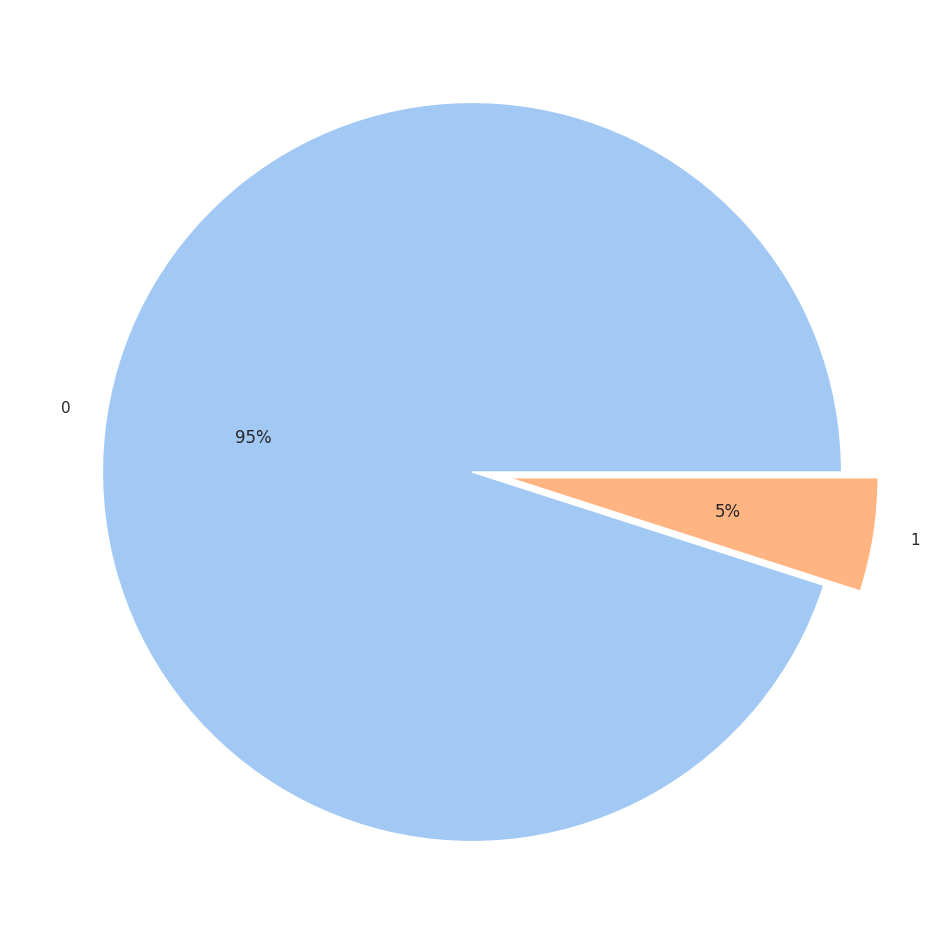

In [145]:
target_pie_values = df.TARGET.value_counts()
plt.pie([target_pie_values[0], target_pie_values[1]], 
        labels=[0, 1], 
        colors=sns.color_palette('pastel'),
        explode=[0, 0.1], autopct='%.0f%%')
plt.show()

We have major imbalance, therefore model which says everytime 0, will have 95% accuracy, so we will deal with it

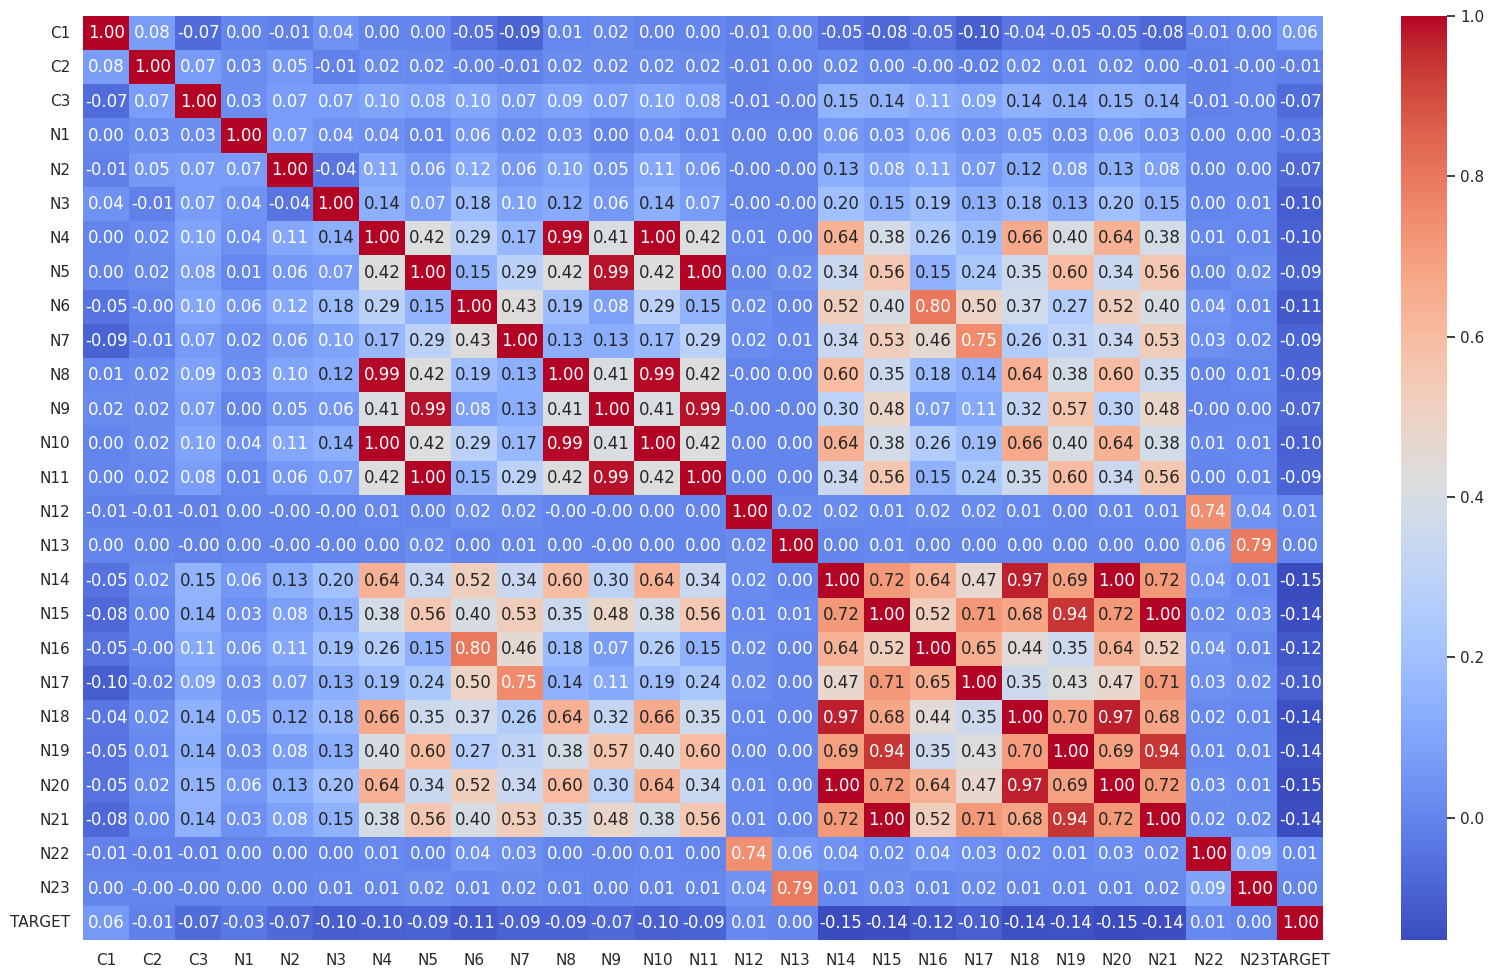

In [146]:
sns.set(rc = {'figure.figsize':(20, 12)})
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Here we can see how data is connected. For example, it is clear that N14 and N20 are the same column or proportional to each other.

## Balancing data and Building models

In [147]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight

In [148]:
X_normalized = df.drop(columns=['TARGET', 'C1'])
y_normalized = df['TARGET']

##### First imbalance solving approach

In [114]:
SMOTE = SMOTE(random_state=43)
X_balanced_normalized = df.drop(columns=['TARGET', 'C1'])
y_balanced_normalized = df['TARGET']


X_balanced_normalized, y_balanced_normalized = SMOTE.fit_resample(X_balanced_normalized, y_balanced_normalized)

cv = KFold(n_splits=5, shuffle=True, random_state=43)


SMOTE creates new synthetic data to balance 0 and 1 targets

### Logistic Regression (without tuning)

In [115]:
lr = LogisticRegression(max_iter=1000)

lr_norm =  lr.fit(X_normalized, y_normalized)
y_pred_1 = lr_norm.predict(X_normalized)
print(classification_report(y_normalized, y_pred_1))

lr_norm_balanced =  lr.fit(X_balanced_normalized, y_balanced_normalized)
y_pred_2 = lr_norm_balanced.predict(X_balanced_normalized)
print(classification_report(y_balanced_normalized, y_pred_2))

print(cross_val_score(lr, X_normalized, y_normalized, cv=cv, scoring='roc_auc').mean())

print(cross_val_score(lr, X_balanced_normalized, y_balanced_normalized, cv=cv, scoring='roc_auc').mean())


              precision    recall  f1-score   support

           0       0.95      1.00      0.97    390815
           1       0.08      0.00      0.00     20392

    accuracy                           0.95    411207
   macro avg       0.52      0.50      0.49    411207
weighted avg       0.91      0.95      0.93    411207

              precision    recall  f1-score   support

           0       0.82      0.65      0.73    390815
           1       0.71      0.85      0.78    390815

    accuracy                           0.75    781630
   macro avg       0.76      0.75      0.75    781630
weighted avg       0.76      0.75      0.75    781630

0.8382249953263512
0.8426829295258464


### Decision Tree (without tuning)

In [116]:
dt = DecisionTreeClassifier()

dt_norm =  dt.fit(X_normalized, y_normalized)
y_pred_1 = dt_norm.predict(X_normalized)
print(classification_report(y_normalized, y_pred_1))

dt_norm_balanced =  dt.fit(X_balanced_normalized, y_balanced_normalized)
y_pred_2 =  dt_norm_balanced.predict(X_balanced_normalized)
print(classification_report(y_balanced_normalized, y_pred_2))

print(cross_val_score(dt, X_normalized, y_normalized, cv=cv, scoring='roc_auc').mean())

print(cross_val_score(dt, X_balanced_normalized, y_balanced_normalized, cv=cv, scoring='roc_auc').mean())

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    390815
           1       0.84      0.81      0.82     20392

    accuracy                           0.98    411207
   macro avg       0.91      0.90      0.91    411207
weighted avg       0.98      0.98      0.98    411207

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    390815
           1       0.98      1.00      0.99    390815

    accuracy                           0.99    781630
   macro avg       0.99      0.99      0.99    781630
weighted avg       0.99      0.99      0.99    781630

0.6995160908923281
0.9180214829495611


#### Decision Tree Tuned

In [127]:
grid = {'min_samples_split': [2,3,4],
        'max_depth': [None, 10, 50, 100],
         'criterion': ['gini', 'entropy']}

gs = GridSearchCV(dt, grid, cv=cv, scoring='roc_auc')

gs.fit(X_normalized, y_normalized)

gs.best_params_

#20 min

KeyboardInterrupt: 

In [118]:
dt_tuned = DecisionTreeClassifier(criterion='gini', min_samples_split=8, max_depth=2)

dt_tuned_norm =  dt_tuned.fit(X_normalized, y_normalized)
y_pred_1 = dt_tuned_norm.predict(X_normalized)
print(classification_report(y_normalized, y_pred_1))

dt_tuned_norm_balanced =  dt_tuned.fit(X_balanced_normalized, y_balanced_normalized)
y_pred_2 =  dt_tuned_norm_balanced.predict(X_balanced_normalized)
print(classification_report(y_balanced_normalized, y_pred_2))

print(cross_val_score(dt_tuned, X_normalized, y_normalized, cv=cv, scoring='roc_auc').mean())

print(cross_val_score(dt_tuned, X_balanced_normalized, y_balanced_normalized, cv=cv, scoring='roc_auc').mean())

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    390815
           1       0.58      0.20      0.30     20392

    accuracy                           0.95    411207
   macro avg       0.77      0.60      0.64    411207
weighted avg       0.94      0.95      0.94    411207

              precision    recall  f1-score   support

           0       0.78      0.90      0.83    390815
           1       0.88      0.74      0.81    390815

    accuracy                           0.82    781630
   macro avg       0.83      0.82      0.82    781630
weighted avg       0.83      0.82      0.82    781630

0.8591628608127715
0.896967770104092


#### SVC (without tuning)

#### 2nd approach to deal with imbalance

In [152]:
svc = LinearSVC()

svc_norm =  svc.fit(X_normalized, y_normalized)
y_pred_1 =  svc_norm.predict(X_normalized)
print(classification_report(y_normalized, y_pred_1))

y_normalized.value_counts()

class_weights = compute_class_weight('balanced', classes=np.unique(y_normalized), y=y_normalized)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

svc_weighted = LinearSVC(class_weight=class_weights_dict)
svc_norm_balanced =  svc_weighted.fit(X_normalized, y_normalized)
y_pred_2 =  svc_norm_balanced.predict(X_normalized)
print(classification_report(y_normalized, y_pred_2))

print(cross_val_score(svc, X_normalized, y_normalized, cv=cv, scoring='roc_auc').mean())

print(cross_val_score(svc_weighted, X_normalized, y_normalized, cv=cv, scoring='roc_auc').mean())

              precision    recall  f1-score   support

           0       0.95      1.00      0.97    390815
           1       0.00      0.00      0.00     20392

    accuracy                           0.95    411207
   macro avg       0.48      0.50      0.49    411207
weighted avg       0.90      0.95      0.93    411207

              precision    recall  f1-score   support

           0       0.99      0.62      0.76    390815
           1       0.11      0.86      0.19     20392

    accuracy                           0.63    411207
   macro avg       0.55      0.74      0.48    411207
weighted avg       0.94      0.63      0.73    411207

0.8353996955739307
0.8359659936912328


### Balanced Random Forest

#### 3rd approach to deal with imbalance

In [131]:
brf = BalancedRandomForestClassifier(sampling_strategy='all', replacement=False, bootstrap=False, random_state=43)

brf_norm =  brf.fit(X_normalized, y_normalized)
y_pred_1 = brf_norm.predict(X_normalized)
print(classification_report(y_normalized, y_pred_1))

print(cross_val_score(brf, X_normalized, y_normalized, cv=cv, scoring='roc_auc').mean())

              precision    recall  f1-score   support

           0       1.00      0.84      0.91    390815
           1       0.24      1.00      0.39     20392

    accuracy                           0.85    411207
   macro avg       0.62      0.92      0.65    411207
weighted avg       0.96      0.85      0.89    411207

0.8584743694011079


## Results

In [122]:
data_to_predict = data_to_predict.drop(columns=['C1'])

KeyError: "['C1'] not found in axis"

In [123]:
from sklearn.metrics import f1_score

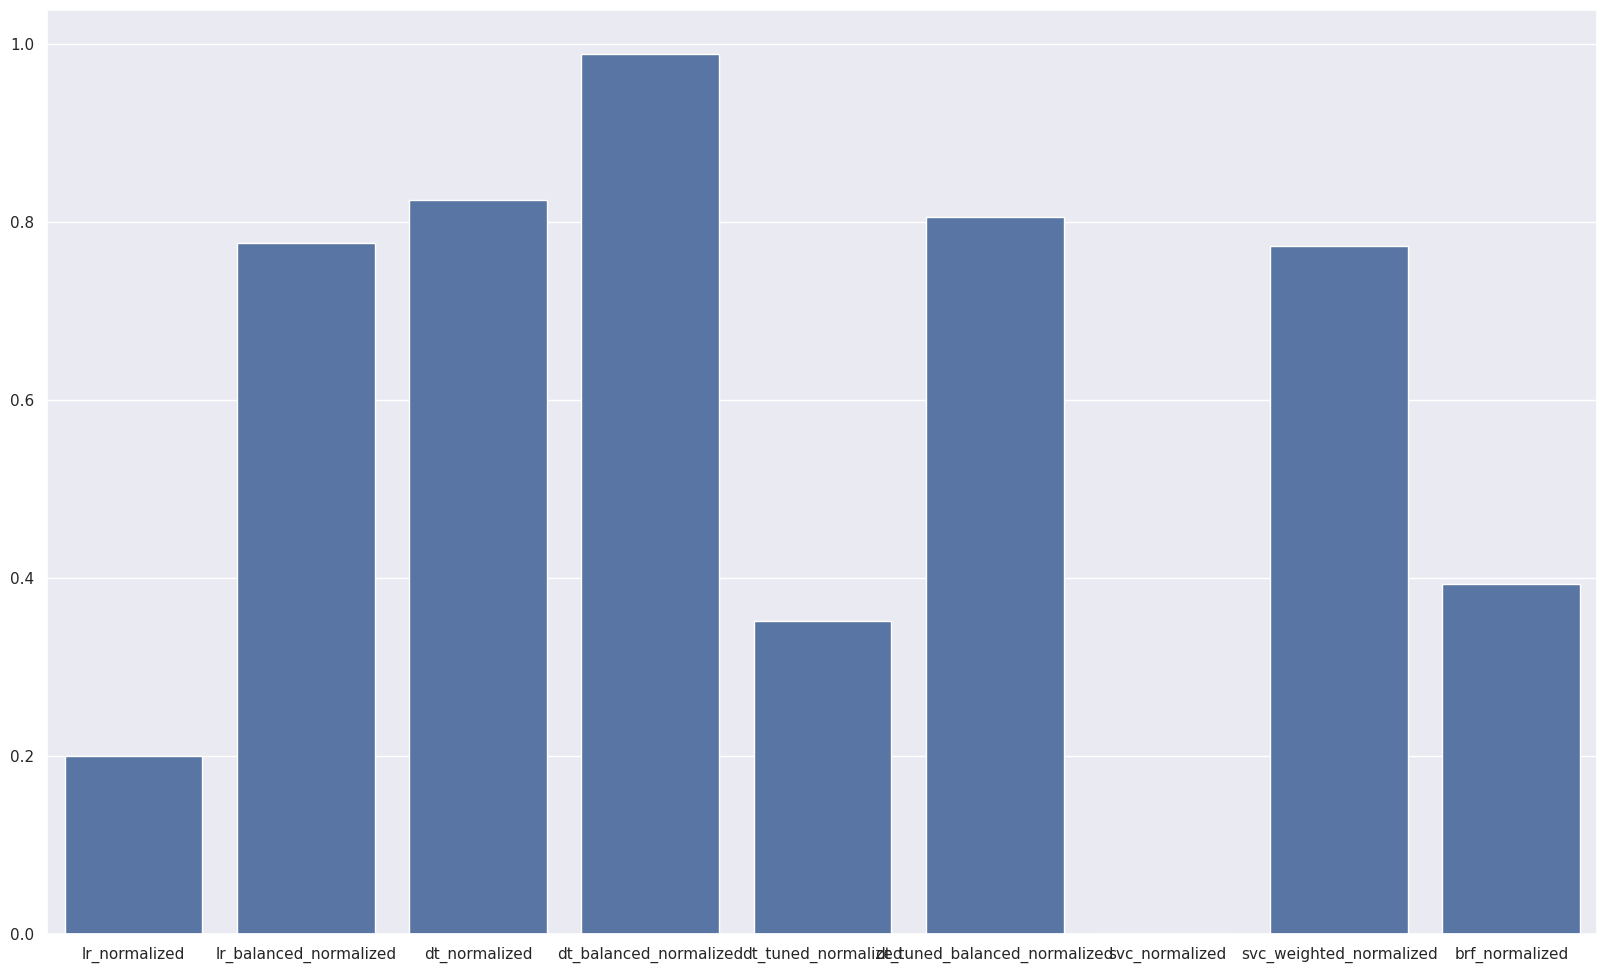

In [153]:
y_pred_lr_normalized_1 = lr_norm.predict(X_normalized)
y_pred_lr_balanced_normalized = lr_norm_balanced.predict(X_balanced_normalized)
y_pred_dt_normalized = dt_norm.predict(X_normalized)
y_pred_dt_balanced_normalized = dt_norm_balanced.predict(X_balanced_normalized)
y_pred_dt_tuned_normalized = dt_tuned_norm.predict(X_normalized)
y_pred_dt_tuned_balanced_normalized = dt_tuned_norm_balanced.predict(X_balanced_normalized)
y_pred_svc_normalized = svc_norm.predict(X_normalized)
y_pred_svc_balanced_normalized = svc_weighted.predict(X_balanced_normalized)
y_pred_brf_normalized = brf_norm.predict(X_normalized)


sns.barplot(x=['lr_normalized', 'lr_balanced_normalized', 'dt_normalized', 'dt_balanced_normalized', 'dt_tuned_normalized', 'dt_tuned_balanced_normalized', 'svc_normalized', 'svc_weighted_normalized', 'brf_normalized'],
            y=[f1_score(y_normalized, y_pred_lr_normalized_1), f1_score(y_balanced_normalized, y_pred_lr_balanced_normalized), f1_score(y_normalized, y_pred_dt_normalized), f1_score(y_balanced_normalized, y_pred_dt_balanced_normalized), f1_score(y_normalized, y_pred_dt_tuned_normalized), f1_score(y_balanced_normalized, y_pred_dt_tuned_balanced_normalized), f1_score(y_normalized, y_pred_svc_normalized), f1_score(y_balanced_normalized, y_pred_svc_balanced_normalized), f1_score(y_normalized, y_pred_brf_normalized)])
plt.show()

lr_normalized and svc_normalized have such low score due-to they say 0 everytime

##### The best model is <font color="green">Decision tree with balanced and normalized data</font>

## Getting results from best model

In [70]:
churn_test_predictions = dt.predict(data_to_predict)
print(churn_test_predictions)

[0 1 0 ... 0 0 0]


In [75]:
churn_test_predictions = pd.DataFrame(churn_test_predictions, columns=['TARGET'])

churn_test_predictions.value_counts()

TARGET
0         92711
1         10091
Name: count, dtype: int64

### Business Interpretation

Step 1:
    Collect data about the user, like data which you provided as 'X_churn_test.csv'

Step 2:
    write this data into one array like [3531383839343233,343439,31,0.0,1210.58,9679.97,657.1,331.6,0.0,6.03,657.1,325.57,657.1,331.6,0.0,0.0,94,31,0,5,94,26,94,31,0,0]
    then give it to model

Step 3:
    if the model gave you 0 it meens that this user is unlikely to leave you
    else user might churn your company.
    When you got 1, try to do anything appropriate to save this user.